#  Bert Modeli

## Genel Özet
- Bert modeli ile ilgili kısa bilgiler verilmiş ve Hepsiburada veri seti Bert Modeli ile predict edilmiştir.

## İçindekiler <a class="anchor" id="menu"></a>
* [1) Bert ( Bidirectional Encoder Representations from Transformers )](#bertnedir)

* [2) Gerekli Kütüphanelerin ve Veri Setinin Yüklenmesi](#veriyukle)

* [3) Bert Modeli ile Tahmin Yapılması](#sadecebert)
    

# 1) Bert ( Bidirectional Encoder Representations from Transformers ) <a class="anchor" id="bertnedir"></a>

![gbert.png](attachment:gbert.png)

### Bert Algoritması Nedir?

BERT Algoritması **Google tarafından** arama motoruna yazılan sorguları daha iyi anlamak ve kullanıcılara daha doğru sonuçlar sunmak adına geliştirilmiştir. BERT algoritması, yapay zeka ve makine öğrenimi teknolojilerini bir arada kullanan bir **doğal dil işleme** tekniğidir.  

BERT, yapılan sorgulardaki kelimeleri **tek tek değerlendirmek yerine**, önündeki ve arkasındaki kelimeler ya da benzer ve eş anlamlı kelimeler ile birlikte değerlendirme yapmaktadır. Böylece özellikle long tail ya da **karmaşık** kullanıcı sorgularını çok daha iyi anlamayı amaçlamaktadır. Bunun yanı sıra Google BERT algoritma güncellemesi ile sorgularda kullanılan bağlaç ve edatların da sorguya ne anlam kattığını çok daha iyi anlayacağını ifade etmektedir.

### Bert Modeli Oluşturulurken Kullanılan Veri Seti ve Teknikler Nelerdir?

#### Kullanılan Veri Seti

- **800M kelime** hazinesine sahip olan **BookCorpus** ve **2.5B** kelime hazinesine sahip olan **Wikipedia** veriseti kullanılarak **bert_large** ve **bert_base adı** verilen 2 temel model geliştirilmiştir.
- Bert_large **16 adet TPU**, bert_base ise **4 adet TPU** ile **4 gün** boyunca train edilmiştir.

#### Kullanılan Teknikler

BERT, Masked Language Modeling (MLM) ve Next Sentence Prediction (NSP) adı verilen iki teknikle eğitilmiştir. Bir cümle modele girdiğinde, cümledeki kelimelerin %15'inde MLM tekniği kullanılmıştır. Bu tekniğin kullanıldığı kelimelerin %80'i [MASK] token’ı ile, %10'u rastgele başka bir kelimeyle değiştirilmiş, geri kalan %10 da değiştirilmeden bırakılmıştır.

Çok fazla kelimenin maskelenmesi eğitimi çok zorlaştırdığından, çok az kelimenin maskelenmesi de cümledeki içeriğin çok iyi kavranamaması durumuna sebep olduğundan Google MLM tekniği için cümledeki kelimelerin %15'ini kullanmayı tercih etmiştir.

**Masked Language Modeling** tekniğinde, maskelenen kelime, açık şekilde beslenen kelimelerle tahmin edilmeye çalışılır. ( Bu teknikte sadece maskelenen kelimeler tahmin edilmeye çalışılır, açık olan veya üzerinde işlem uygulanmayan kelimelerle ilgili herhangi bir tahmin gerçekleştirilmez. Bu sebeple Loss değeri sadece işlem uygulanan kelimeler üzerinden değerlendirilir).

![mlm.png](attachment:mlm.png)

**Next Sentence Prediction** tekniğinde ise ikili olarak gelen cümle çiftlerinde, ikinci cümlenin ilk cümlenin devamı olup olmadığı tahmin edilir. Bu teknikten önce ikinci cümlelerin %50'si rastgele değiştirilir, %50'si ise aynı şekilde bırakılır.

![nextsentencepred.png](attachment:nextsentencepred.png)

Training esnasındaki **optimizasyon**, bu iki teknik kullanılırken ortaya çıkan kaybın minimuma indirilmesi ile gerçekleştirilir.

### Fine Tuning

BERT kendi başına **GLM** ( genelleştirilmiş doğrusal model ) adı verilen, **birden fazla problemde kullanılabilecek** şekilde tasarlanmış bir modeldir.

 Google tarafından, hazır-eğitilmiş modeller **açık olarak paylaşılmıştır**. Hazır-eğitilmiş modeller **fine-tuning** adı verilen teknikle **yeni problemlerin çözümünde** kullanılabilmektedir.

## 2) Gerekli Kütüphanelerin ve Veri Setinin Yüklenmesi <a class="anchor" id="veriyukle"></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [30]:
comments = pd.read_csv("hepsiburada.csv", nrows = 10000)

Veri seti Türkiye'deki online alışveriş sitelerinden alınan yorumlardan oluşmaktadır.

Veri seti 10000 satır ve 2 sütundan oluşmaktadır.

- **Review**: Müşteri tarafından ürüne yapılan yorum.
- **Rating**: Yorumun türü. 1 olumlu yorumları, 0 ise olumsuz yorumları temsil etmektedir.


In [31]:
comments

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
9995,1,"Hızlı teslimat, uygun fiyat. Özellekleri yeter..."
9996,1,"Herhangi bir sıkıntı çıkmadı, gece derin uyku ..."
9997,1,Sorunsuz ürün teşekkürler
9998,1,Sigarayi biraktim biraz kilo aldim.bu bileklik...


In [32]:
comments["Rating"].value_counts()

1    9570
0     430
Name: Rating, dtype: int64

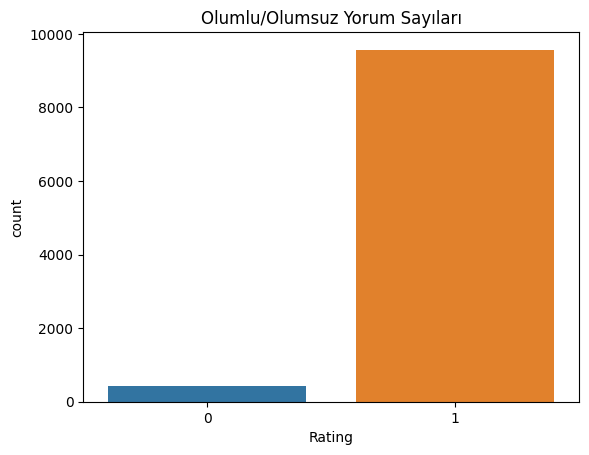

In [33]:
plt.title("Olumlu/Olumsuz Yorum Sayıları")
sns.countplot(data=comments, x="Rating");

## 3) Bert Modeli  ile Tahmin Yapılması <a class="anchor" id="sadecebert"></a>

In [34]:
!pip install transformers

In [7]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline, TextClassificationPipeline

sentiment_analysis_pipeline = pipeline("sentiment-analysis",model="emre/turkish-sentiment-analysis",
                device=0, tokenizer ="emre/turkish-sentiment-analysis")

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


#### Bert Modeli ile Tahmin Yapılması

In [10]:
start=time.time()
bert_outputs = sentiment_analysis_pipeline(list(comments.Review.values),
                             batch_size = 32)

print("10000 yorumun etiketlenme süresi (saniye): " + str(time.time()-start))

10000 yorumun etiketlenme süresi (saniye): 63.55619478225708


In [11]:
predicted_labels = [label_score['label'] for label_score in bert_outputs]

print('Predicted label counts:', dict(Counter(predicted_labels)) )

predicted_labels = np.where(np.array(predicted_labels) == 'Positive', 1, 0)

Predicted label counts: {'Positive': 9596, 'Negative': 403, 'Notr': 1}


#### Tahmin Sonuçlarının Dataframe'e Eklenmesi

In [12]:
comments["Bert_Predicted_Label"] = pd.Series(predicted_labels).values

In [13]:
comments

,Rating,Review,Bert_Predicted_Label
0,1,3 yıldır tık demedi. :),1
1,1,3 yıldır kullanıyorum müthiş,1
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...,1
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...,1
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...,1
...,...,...,...
9995,1,"Hızlı teslimat, uygun fiyat. Özellekleri yeter...",1
9996,1,"Herhangi bir sıkıntı çıkmadı, gece derin uyku ...",1
9997,1,Sorunsuz ürün teşekkürler,1
9998,1,Sigarayi biraktim biraz kilo aldim.bu bileklik...,1


#### Doğruluk Değerinin Hesaplanması ve Karmaşıklık Matrisi Oluşturulması

In [25]:
acc = accuracy_score(comments["Rating"],comments["Bert_Predicted_Label"])

print("Bert tahmini accuracy değeri: " + str(acc))

Bert tahmini accuracy değeri: 0.9834


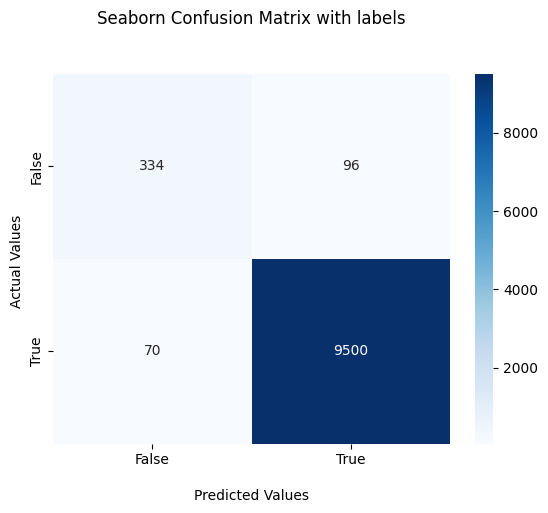

In [17]:
conf_matrix = confusion_matrix(comments["Rating"], comments["Bert_Predicted_Label"])

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt="g")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show();

In [23]:
f1 = f1_score(comments["Rating"], comments["Bert_Predicted_Label"])
print("F1 Score:", f1)

F1 Score: 0.991338829176667


In [26]:
test_sentences = ["Beklentilerimi karşılamadı, hayal kırıklığına uğradım.",
                  "Faturasız gönderiyorlar şirket için alıyorsanız dikkat edin.",
                  "Büyük, kulağı kaplayan, ağır olmayan, sesi gür (100 db), kablosu uzun, mikrofonlu kulaklık. Bende saatlerce müzik dinliyorum kulağım pişmiyor. 100 db civarında saatlerce müzik dinlerseniz tabi kulağınız pişer, dikkat etmek lazım.",
                  "kalitesi belli bir ürün için tek kriter nereden ucuz alrım idi. Hepsiburada.com da indirimi görünce hemen aldım.Hızlı kargo ile ertesi gün adresimde id.",
                  "daha önce bir çok marka kullandım bazıları kırıldı bazıları bozuldu ama kingstone baska"]

In [27]:
bert_outputs = sentiment_analysis_pipeline(test_sentences)

In [28]:
bert_outputs

[{'label': 'Negative', 'score': 0.9981437921524048},
 {'label': 'Negative', 'score': 0.9781482219696045},
 {'label': 'Positive', 'score': 0.9630734920501709},
 {'label': 'Positive', 'score': 0.998455286026001},
 {'label': 'Positive', 'score': 0.9978964328765869}]